In [1]:
# Mount Google Drive in Colab

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import re
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [2]:
# File paths

# File paths
train_accounts_path = r"C:\Users\droxr\Downloads\senior_ds_test\senior_ds_test\data\train\accounts_data_train.json"
train_enquiry_path = r"C:\Users\droxr\Downloads\senior_ds_test\senior_ds_test\data\train\enquiry_data_train.json"
train_flag_path = r"C:\Users\droxr\Downloads\senior_ds_test\senior_ds_test\data\train\train_flag.csv"

test_accounts_path = r"C:\Users\droxr\Downloads\senior_ds_test\senior_ds_test\data\test\accounts_data_test.json"
test_enquiry_path = r"C:\Users\droxr\Downloads\senior_ds_test\senior_ds_test\data\test\enquiry_data_test.json"
test_flag_path = r"C:\Users\droxr\Downloads\senior_ds_test\senior_ds_test\data\test\test_flag.csv"


# handling Json data functions

""" FUNCTION_1: fixing accounts data"""

def accounts_to_df(df, uid_column="uid"):
    reshaped = []
    for idx, row in df.iterrows():
        uid = row[uid_column] if uid_column in df.columns else idx
        for acc in row:
            if isinstance(acc, dict):
                acc_record = {"uid": uid}
                acc_record.update(acc)
                reshaped.append(acc_record)
    return pd.DataFrame(reshaped)

""" FUNCTION_2: fixing enquiry data"""
def enquiry_to_df(df, uid_column="uid"):
    reshaped = []
    for idx, row in df.iterrows():
        uid = row[uid_column] if uid_column in df.columns else idx
        for enq in row:
            if isinstance(enq, dict):
                enq_record = {"uid": uid}
                enq_record.update(enq)
                reshaped.append(enq_record)
    return pd.DataFrame(reshaped)


# Load all datasets
try:
    # Train datasets
    train_accounts_raw = pd.read_json(train_accounts_path)
    train_enquiry_raw = pd.read_json(train_enquiry_path)
    train_flag = pd.read_csv(train_flag_path)

    # Convert wide → flat
    train_accounts = accounts_to_df(train_accounts_raw)
    train_enquiry = enquiry_to_df(train_enquiry_raw)

    # Test datasets
    test_accounts_raw = pd.read_json(test_accounts_path)
    test_enquiry_raw = pd.read_json(test_enquiry_path)
    test_flag = pd.read_csv(test_flag_path)

    # Convert wide → flat
    test_accounts = accounts_to_df(test_accounts_raw)
    test_enquiry = enquiry_to_df(test_enquiry_raw)

    # Print shapes
    print("✓ Data loaded successfully!")
    print(f"Train Accounts: {train_accounts.shape}")
    print(f"Train Enquiry: {train_enquiry.shape}")
    print(f"Train Flag: {train_flag.shape}")
    print(f"Test Accounts: {test_accounts.shape}")
    print(f"Test Enquiry: {test_enquiry.shape}")
    print(f"Test Flag: {test_flag.shape}")


except FileNotFoundError as e:
    print(f"File not found: {e}")
except Exception as e:
    print(f"Error loading data: {e}")


✓ Data loaded successfully!
Train Accounts: (1245310, 7)
Train Enquiry: (1909926, 4)
Train Flag: (261383, 3)
Test Accounts: (220013, 7)
Test Enquiry: (337662, 4)
Test Flag: (46127, 2)



Checking if all the dataframes are as per the described table format in problem PDF

In [3]:
# Set display options for clean table view
pd.set_option("display.max_columns", None)   # show all columns
pd.set_option("display.width", 2000)         # wide console table
pd.set_option("display.max_colwidth", None)  # prevent column wrapping

# Example: show train_accounts head(2) cleanly
print("Train Accounts:")
print(train_accounts.head(2).to_string(index=False), "\n")

print("Train Enquiry:")
print(train_enquiry.head(2).to_string(index=False), "\n")

print("Train Flag:")
print(train_flag.head(2).to_string(index=False), "\n")

print("Test Accounts:")
print(test_accounts.head(2).to_string(index=False), "\n")

print("Test Enquiry:")
print(test_enquiry.head(2).to_string(index=False), "\n")

print("Test Flag:")
print(test_flag.head(2).to_string(index=False), "\n")


Train Accounts:
        uid     credit_type  loan_amount  amount_overdue  open_date closed_date                                 payment_hist_string
AAA09044550 Consumer credit     272745.0             0.0 2018-09-22  2020-02-22 000000000000000000000010000000000000000000000000000
AAA09044550 Consumer credit       4500.0             0.0 2018-03-08  2019-07-25    000000000000000014044000000000000000000000000000 

Train Enquiry:
        uid         enquiry_type  enquiry_amt enquiry_date
AAA08065248     Interbank credit       168839   2020-11-08
AAA08065248 Mobile operator loan       268392   2020-09-20 

Train Flag:
        uid NAME_CONTRACT_TYPE  TARGET
XDA69787158         Cash loans       0
BSE47789733         Cash loans       0 

Test Accounts:
        uid     credit_type  loan_amount  amount_overdue  open_date closed_date      payment_hist_string
AAA14437029 Consumer credit     31630.50             0.0 2014-03-30  2014-11-29 000000000000000000000000
AAA14437029 Consumer credit     1461

This confirms all tables are in same format as mentioned in problem statement

In [4]:
""" FUNCTION_3: data quality check"""

import pandas as pd

def summarize_dataframe(df, name="DataFrame"):
    print(f"\n Summary for {name}")
    print("-" * 60)

    # Shape
    print(f"Shape: {df.shape}")

    # Columns
    print(f"Columns: {list(df.columns)}\n")

    # Data types
    print("Data Types:")
    print(df.dtypes)
    print()

    # Missing values
    missing = df.isnull().sum()
    missing_perc = (missing / len(df) * 100).round(2)
    missing_df = pd.DataFrame({"Missing": missing, "Missing (%)": missing_perc})
    missing_df = missing_df[missing_df["Missing"] > 0]  # filter non-missing
    print("Missing Values:")
    if missing_df.empty:
        print("None\n")
    else:
        print(missing_df, "\n")

    # Duplicates (with %)
    dup_count = df.duplicated().sum()
    dup_perc = round((dup_count / len(df)) * 100, 2)
    print(f"Duplicate Rows: {dup_count} ({dup_perc}%)\n")

    # Unique values per column
    unique_counts = df.nunique()
    print("Unique Values per Column:")
    print(unique_counts)
    print("=" * 60)


In [5]:
# Train Summary
summarize_dataframe(train_accounts, "Train Accounts")
summarize_dataframe(train_enquiry, "Train Enquiry")
summarize_dataframe(train_flag, "Train Flag")



 Summary for Train Accounts
------------------------------------------------------------
Shape: (1245310, 7)
Columns: ['uid', 'credit_type', 'loan_amount', 'amount_overdue', 'open_date', 'closed_date', 'payment_hist_string']

Data Types:
uid                     object
credit_type             object
loan_amount            float64
amount_overdue         float64
open_date               object
closed_date             object
payment_hist_string     object
dtype: object

Missing Values:
             Missing  Missing (%)
loan_amount        3         0.00
closed_date   463035        37.18 

Duplicate Rows: 6411 (0.51%)

Unique Values per Column:
uid                    223918
credit_type                15
loan_amount            189286
amount_overdue           1266
open_date                2923
closed_date              2913
payment_hist_string     45212
dtype: int64

 Summary for Train Enquiry
------------------------------------------------------------
Shape: (1909926, 4)
Columns: ['uid', 'enq

**Accounts (~1.25M × 7)**

223K users, multiple credit lines each.

closed_date missing for 37% → open accounts.

*3 missing in loan_amount → trivial fix.*

*6.4K duplicate rows (0.51%) → check exactness.*



**Enquiry (~1.9M × 4)**

261K users → clean 1:N with accounts.

Just 9 dups → negligible.

17 enquiry types + amounts + dates → good behavioral signal.

**Flag (261K × 3)**

One row per user: contract type + binary target.

No missing, no dups → label-ready.



In [6]:
#Test Summary
summarize_dataframe(test_accounts, "Test Accounts")
summarize_dataframe(test_enquiry, "Test Enquiry")
summarize_dataframe(test_flag, "Test Flag")


 Summary for Test Accounts
------------------------------------------------------------
Shape: (220013, 7)
Columns: ['uid', 'credit_type', 'loan_amount', 'amount_overdue', 'open_date', 'closed_date', 'payment_hist_string']

Data Types:
uid                     object
credit_type             object
loan_amount            float64
amount_overdue         float64
open_date               object
closed_date             object
payment_hist_string     object
dtype: object

Missing Values:
             Missing  Missing (%)
closed_date    81636        37.11 

Duplicate Rows: 1104 (0.5%)

Unique Values per Column:
uid                    39572
credit_type               12
loan_amount            58104
amount_overdue           317
open_date               2922
closed_date             2854
payment_hist_string    11948
dtype: int64

 Summary for Test Enquiry
------------------------------------------------------------
Shape: (337662, 4)
Columns: ['uid', 'enquiry_type', 'enquiry_amt', 'enquiry_date']

Da

**Test Accounts (~220K × 7)**

39K users → ~5.5 accounts each (train-like).

closed_date missing 37% → open accounts.

1.1K duplicates → clean same as train.

12 credit types vs 15 in train → category mismatch to align.

**Test Enquiry (~338K × 4)**

46K users → ~7 enquiries each (slightly higher than train).

No duplicates → clean.

Same 17 enquiry types → check distribution for drift.

**Insights from both train and test dataframe summaries we have**
1. ignoring the account entry where loan amount is not mentioned (According to the Reserve Bank of India guidelines, NBFCs must convey in writing to the borrower by means of sanction letter the amount of loan sanctioned along with the terms and conditions. This is a mandatory regulatory requirement)
2. the duplicacy in both train and test dataset for accounts show similar percentage 0.5% which is comparably small and ignoring them dont directly affect prediction test set
3. The missing Close date means the Loan is Active so creating a flag of active with 1,0 value
4. 9 duplicates in  enquiry train dataset

In [7]:
print("Before dropping:")
print("  train_accounts :", train_accounts.shape)
print("  test_accounts  :", test_accounts.shape)
print("  train_enquiry  :", train_enquiry.shape)

# Dropping duplicates
train_accounts = train_accounts.drop_duplicates()
test_accounts = test_accounts.drop_duplicates()
train_enquiry=train_enquiry.drop_duplicates()
# dropping entries with no loan amount sanctioned
train_accounts = train_accounts.dropna(subset=["loan_amount"])
# Active flag
train_accounts["active_flag"] = train_accounts["closed_date"].isna().astype(int)
test_accounts["active_flag"]  = test_accounts["closed_date"].isna().astype(int)

print("After dropping:")
print("  train_accounts :", train_accounts.shape)
print("  test_accounts  :", test_accounts.shape)
print("  train_enquiry  :", train_enquiry.shape)


Before dropping:
  train_accounts : (1245310, 7)
  test_accounts  : (220013, 7)
  train_enquiry  : (1909926, 4)
After dropping:
  train_accounts : (1238896, 8)
  test_accounts  : (218909, 8)
  train_enquiry  : (1909917, 4)


Now Understanding each accounts and enquiry data set

**Analyze Summary Statistics of the datasets**


In [8]:
# Function to extract numerical stats
def numerical_summary(df, name="DataFrame"):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    print(f"\n{name} - Numerical columns: {num_cols}\n")
    return df[num_cols].describe().T

# Apply to all three
accounts_summary = numerical_summary(train_accounts, "train_accounts")
enquiry_summary = numerical_summary(train_enquiry, "train_enquiry")
flag_summary = numerical_summary(train_flag, "train_flag")

# Display results
print("\n--- train_accounts_raw ---\n", accounts_summary)
print("\n--- train_enquiry_raw ---\n", enquiry_summary)
print("\n--- train_flag ---\n", flag_summary)


train_accounts - Numerical columns: ['loan_amount', 'amount_overdue']


train_enquiry - Numerical columns: ['enquiry_amt']


train_flag - Numerical columns: ['TARGET']


--- train_accounts_raw ---
                     count           mean           std  min        25%       50%       75%          max
loan_amount     1238896.0  351314.792026  1.095944e+06  0.0  51223.455  124317.0  306450.0  396000000.0
amount_overdue  1238896.0      42.200549  6.685780e+03  0.0      0.000       0.0       0.0    3756681.0

--- train_enquiry_raw ---
                  count           mean           std     min      25%       50%       75%       max
enquiry_amt  1909917.0  116042.431549  82070.412175  1007.0  56000.0  108000.0  159000.0  499995.0

--- train_flag ---
            count     mean       std  min  25%  50%  75%  max
TARGET  261383.0  0.08056  0.272159  0.0  0.0  0.0  0.0  1.0


**train_accounts**

loan_amount: Median ~1.2 lakh, but some loans go as high as 39.6 crore → very skewed with extreme outliers.

amount_overdue: Mostly zero, but a few cases go up to 37.5 lakh → highly skewed.

**train_enquiry**

enquiry_amt: Median ~1.08 lakh, spread is moderate (1k to 5 lakh) → distribution is more balanced.

**train_flag**

TARGET: About 8% positives, 92% negatives → clear class imbalance.

**EDA**
Insights from the Table

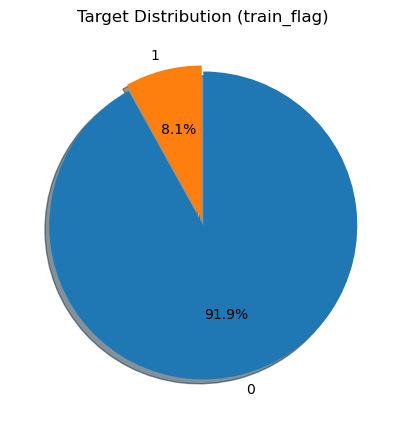

In [9]:
# ============================================
# 1. Flag pie chart (target distribution)
# ============================================
plt.figure(figsize=(5,5))
train_flag['TARGET'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    explode=[0.02,0.02],
    shadow=True
)
plt.ylabel('')
plt.title("Target Distribution (train_flag)")
plt.show()

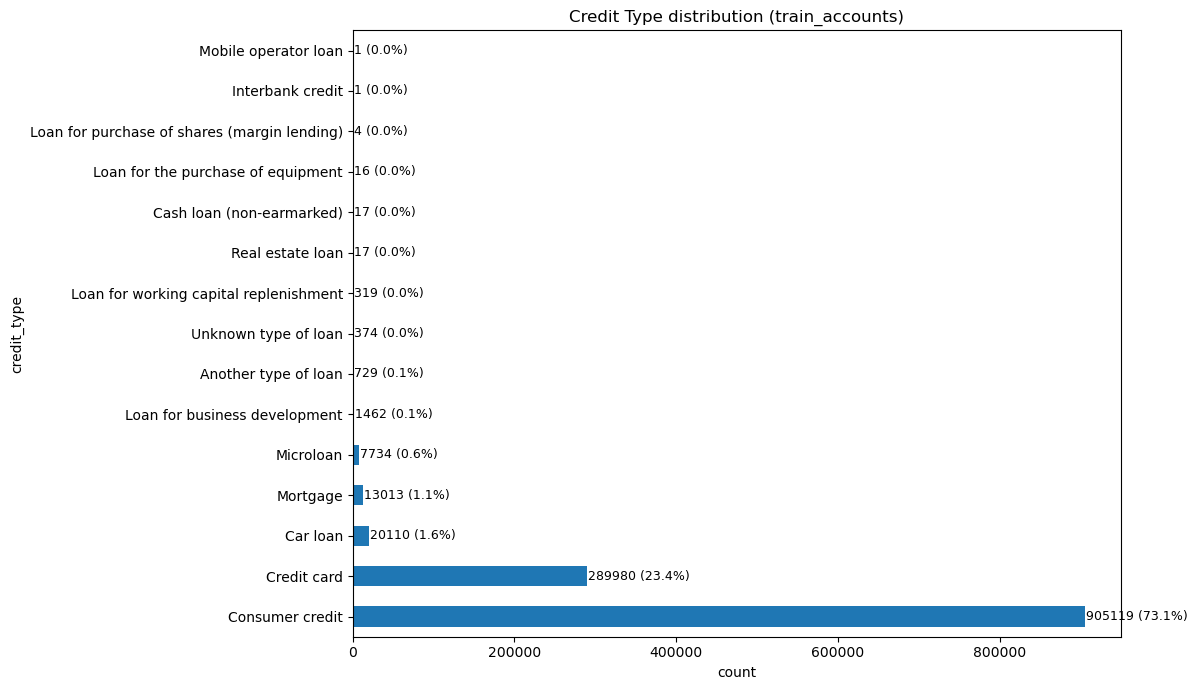

In [10]:
# ============================================
# Univariate plot - train_accounts (credit_type)
# ============================================

# Get top 15 categories
counts = train_accounts['credit_type'].value_counts().head(20)

plt.figure(figsize=(12,7))  # wider + taller for clarity
ax = counts.plot(kind='barh')  # horizontal bars

plt.title("Credit Type distribution (train_accounts)")
plt.xlabel("count")
plt.ylabel("credit_type")

# Annotate bars with count + percentage
total = len(train_accounts)
for p in ax.patches:
    count = int(p.get_width())
    pct = 100 * count / total
    ax.annotate(f"{count} ({pct:.1f}%)",
                (p.get_width() + total*0.001,  # small offset to the right
                 p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

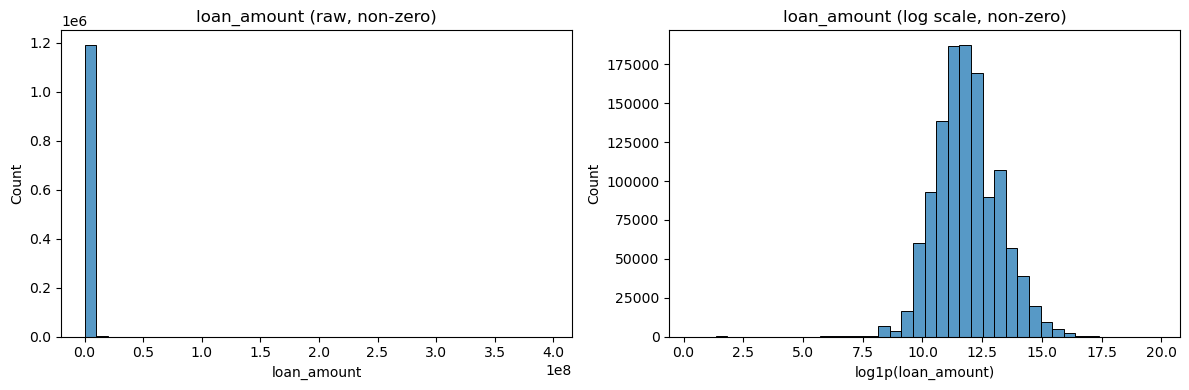

loan_amount: Zero count = 46,077 | Non-zero count = 1,192,819


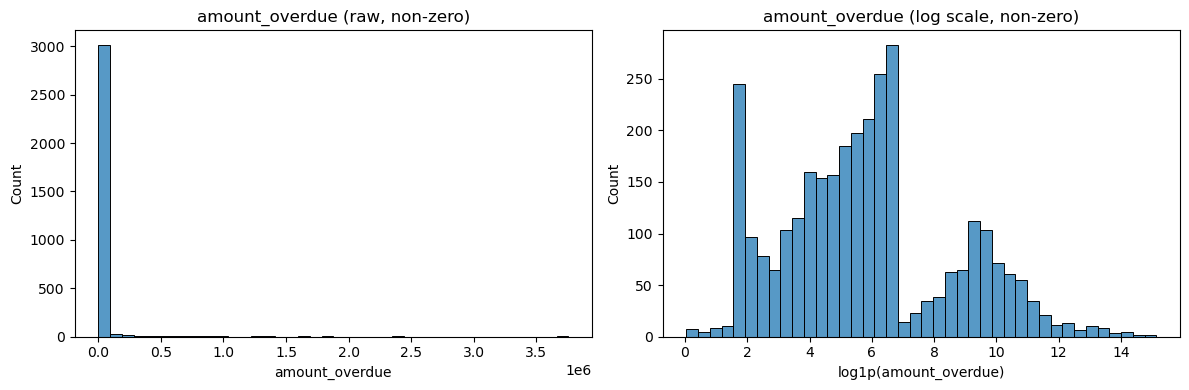

amount_overdue: Zero count = 1,235,806 | Non-zero count = 3,090


In [11]:

num_cols = ['loan_amount', 'amount_overdue']

for col in num_cols:
    series = train_accounts[col].fillna(0)

    # Split zeros vs non-zeros
    zeros = (series == 0).sum()
    non_zero = series[series > 0]

    plt.figure(figsize=(12,4))

    # Raw distribution (non-zeros only)
    plt.subplot(1,2,1)
    sns.histplot(non_zero, kde=False, bins=40)
    plt.title(f"{col} (raw, non-zero)")
    plt.xlabel(col)

    # Log-transformed (non-zeros only)
    plt.subplot(1,2,2)
    sns.histplot(np.log1p(non_zero), kde=False, bins=40)
    plt.title(f"{col} (log scale, non-zero)")
    plt.xlabel(f"log1p({col})")

    plt.tight_layout()
    plt.show()

    # Print zero counts
    print(f"{col}: Zero count = {zeros:,} | Non-zero count = {len(non_zero):,}")


**loan_amount**: Extremely skewed; log transform makes it usable and near-normal.

**amount_overdue**: Mostly zero (~99.7%); for non-zero values, log transform reveals multiple clusters.

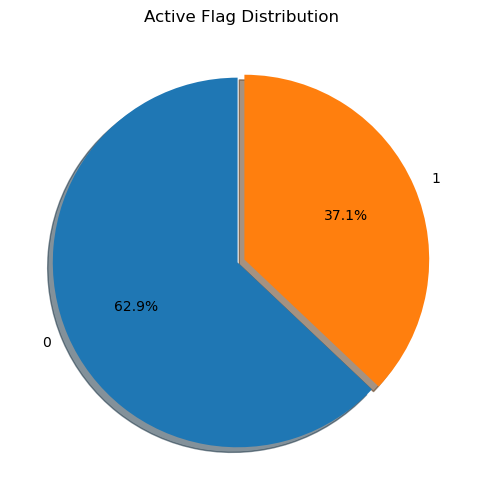

In [12]:
# ============================================
# Pie chart for active_flag
# ============================================
plt.figure(figsize=(6,6))
train_accounts['active_flag'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    explode=[0.02,0.02] if train_accounts['active_flag'].nunique()==2 else None
)
plt.ylabel('')
plt.title("Active Flag Distribution")
plt.show()

<Figure size 1200x500 with 0 Axes>

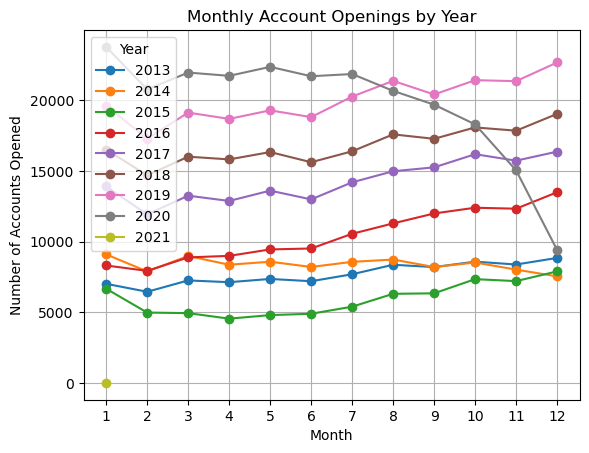

<Figure size 1200x500 with 0 Axes>

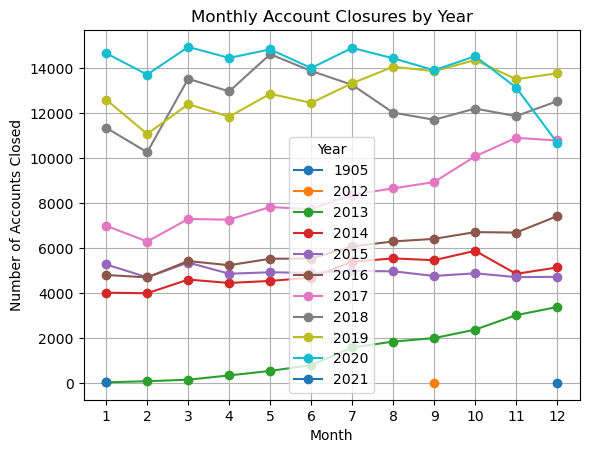

In [13]:
# ============================================
# Date-based analysis for Account
# ============================================


# Ensure datetime
train_accounts['open_date'] = pd.to_datetime(train_accounts['open_date'], errors='coerce')
train_accounts['closed_date'] = pd.to_datetime(train_accounts['closed_date'], errors='coerce')

# --------------------------------------------
# 1. Month-wise trend for Open Date
# --------------------------------------------
open_df = train_accounts.dropna(subset=['open_date']).copy()
open_df['year'] = open_df['open_date'].dt.year
open_df['month'] = open_df['open_date'].dt.month

monthly_open = (
    open_df.groupby(['year','month'])
    .size()
    .reset_index(name='count')
)
monthly_open_pivot = monthly_open.pivot(index='month', columns='year', values='count')

plt.figure(figsize=(12,5))
monthly_open_pivot.plot(marker='o')
plt.title("Monthly Account Openings by Year")
plt.xlabel("Month")
plt.ylabel("Number of Accounts Opened")
plt.xticks(range(1,13))
plt.legend(title='Year')
plt.grid(True)
plt.show()

# --------------------------------------------
# 2. Month-wise trend for Closed Date
# --------------------------------------------
close_df = train_accounts.dropna(subset=['closed_date']).copy()
close_df['year'] = close_df['closed_date'].dt.year
close_df['month'] = close_df['closed_date'].dt.month

monthly_close = (
    close_df.groupby(['year','month'])
    .size()
    .reset_index(name='count')
)
monthly_close_pivot = monthly_close.pivot(index='month', columns='year', values='count')

plt.figure(figsize=(12,5))
monthly_close_pivot.plot(marker='o')
plt.title("Monthly Account Closures by Year")
plt.xlabel("Month")
plt.ylabel("Number of Accounts Closed")
plt.xticks(range(1,13))
plt.legend(title='Year')
plt.grid(True)
plt.show()


**account_openings**: 2019 peaked highest (~22K); 2020 shows COVID disruption - dramatic Mar-Oct collapse (22K→17K) with partial year-end recovery, contrasting other years' stable seasonal patterns.

Monthly patterns: Mar-May peak, Jun-Oct decline (severe in 2020), Nov-Dec recover

**account_closures**: 2020 highest (~ 14K), 2019 second highest (~13K); 2020 shows sharp Dec drop (14K→11K) while other years remain relatively stable throughout.

Monthly patterns: Most years flat with minor fluctuations; 2020 anomaly with sudden year-end decline suggests policy changes or retention effortsy.

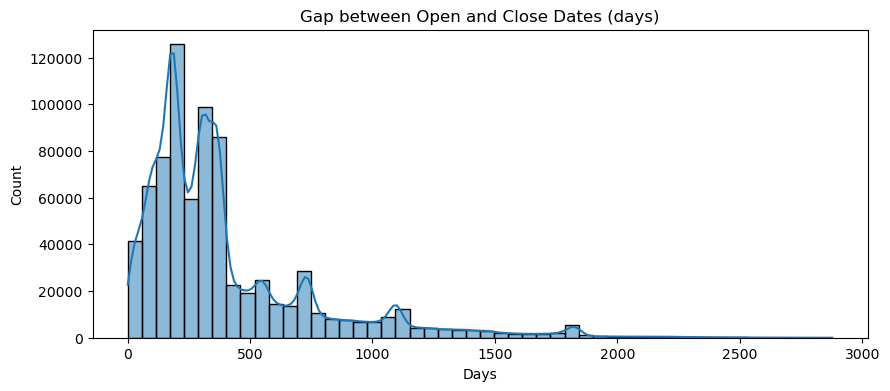

<Figure size 1200x500 with 0 Axes>

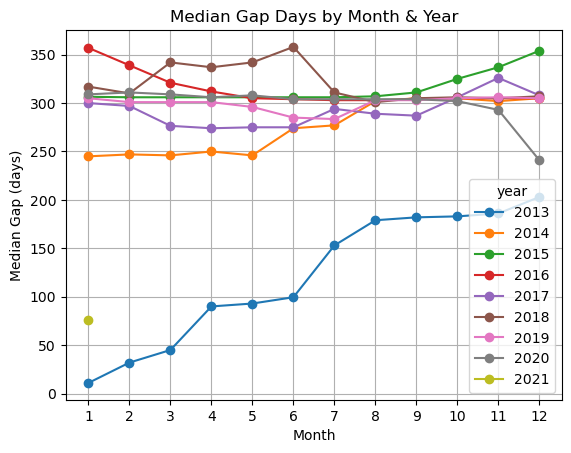

In [14]:
# ============================================
#   Gap between open and closed date
# ============================================


# Compute gap in days for closed accounts
closed_accounts = train_accounts.dropna(subset=['closed_date','open_date']).copy()
closed_accounts['gap_days'] = (closed_accounts['closed_date'] - closed_accounts['open_date']).dt.days
closed_accounts = closed_accounts[closed_accounts['gap_days'] > 0]  # remove non-positive gaps

#  Histogram of gap_days
plt.figure(figsize=(10,4))
sns.histplot(closed_accounts['gap_days'], bins=50, kde=True)
plt.title("Gap between Open and Close Dates (days)")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()


#  Month-wise trend (median gap per month-year)
closed_accounts['year'] = closed_accounts['closed_date'].dt.year
closed_accounts['month'] = closed_accounts['closed_date'].dt.month
monthly_gap = closed_accounts.groupby(['year','month'])['gap_days'].median().unstack(level=0)

plt.figure(figsize=(12,5))
monthly_gap.plot(marker='o')
plt.title("Median Gap Days by Month & Year")
plt.xlabel("Month")
plt.ylabel("Median Gap (days)")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


account_lifecycle_gap: Heavily concentrated around 300-400 days with extreme right skew; most accounts close within 1-2 years of opening.



Median gap tren ds: 2013 shows dramatic seasonal pattern (10→180 days Jan→Dec); other years stable at ~250-350 days. 2020 shows year-end drop to ~240 days, suggesting accelerated closures during pandemi
.

Distribu tion: Peak at ~350 days indicates typical account lifespan of approximately 1 year across the portfolio

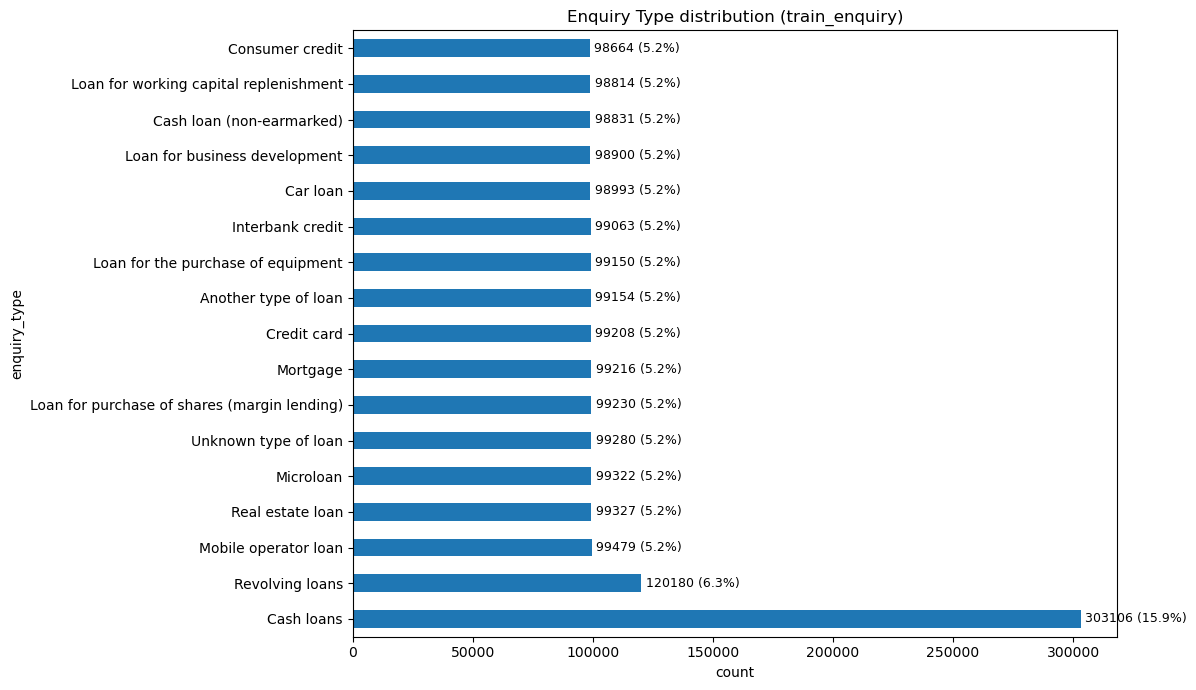

In [15]:
# ============================================
# Enquiry Category Distribution
# ============================================


# Get top categories
counts = train_enquiry['enquiry_type'].value_counts()

plt.figure(figsize=(12,7))  # wider & taller
ax = counts.plot(kind='barh')  # horizontal bars

plt.title("Enquiry Type distribution (train_enquiry)")
plt.xlabel("count")
plt.ylabel("enquiry_type")

# Annotate bars with count + percentage
total = len(train_enquiry)
for p in ax.patches:
    count = int(p.get_width())
    pct = 100 * count / total
    ax.annotate(f"{count} ({pct:.1f}%)",
                (p.get_width() + total*0.001,  # offset a bit to the right
                 p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [16]:
train_enquiry.columns

Index(['uid', 'enquiry_type', 'enquiry_amt', 'enquiry_date'], dtype='object')

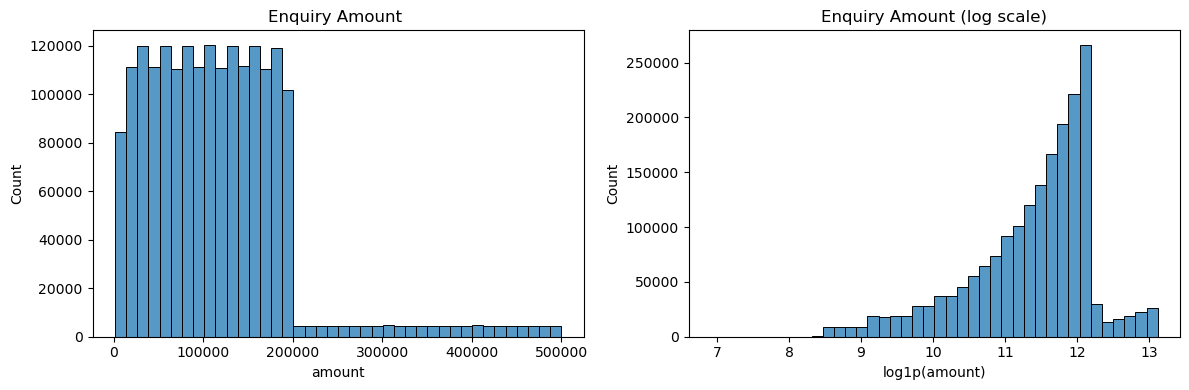

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ============================================
# Enquiry Amount Distribution
# ============================================
series = train_enquiry['enquiry_amt'].fillna(0)
zeros = (series == 0).sum()
non_zero = series[series > 0]

plt.figure(figsize=(12,4))

# Raw distribution
plt.subplot(1,2,1)
sns.histplot(non_zero, bins=40, kde=False)
plt.title("Enquiry Amount ")
plt.xlabel("amount")

# Log-transformed
plt.subplot(1,2,2)
sns.histplot(np.log1p(non_zero), bins=40, kde=False)
plt.title("Enquiry Amount (log scale)")
plt.xlabel("log1p(amount)")

plt.tight_layout()
plt.show()



**enquiry_amount**: Extremely right-skewed with massive concentration in 50K-150K range; log transform creates near-normal distribution suitable for modeling, revealing the underlying structure spans from ~10^8 to 10^13 scale.

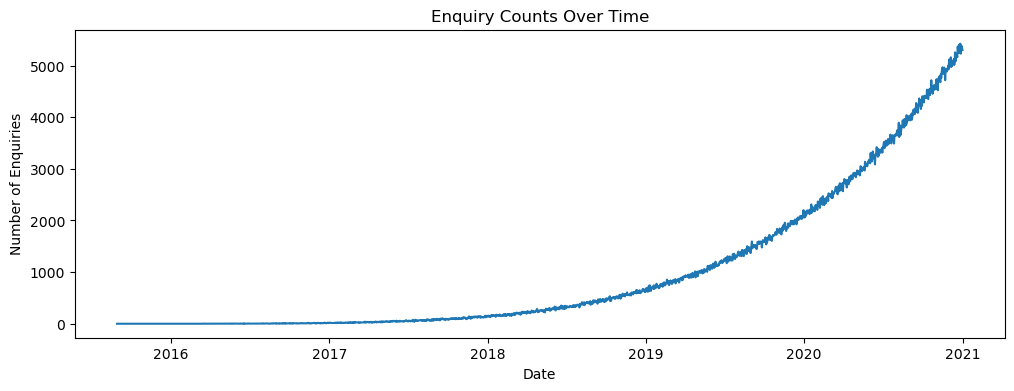

In [18]:
# Enquiry Date Trends
# ============================================
# Ensure datetime
train_enquiry['enquiry_date'] = pd.to_datetime(train_enquiry['enquiry_date'], errors='coerce')

# Basic counts over time
daily_counts = train_enquiry.groupby(train_enquiry['enquiry_date'].dt.date).size()
plt.figure(figsize=(12,4))
daily_counts.plot()
plt.title("Enquiry Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Enquiries")
plt.show()

<Figure size 1200x500 with 0 Axes>

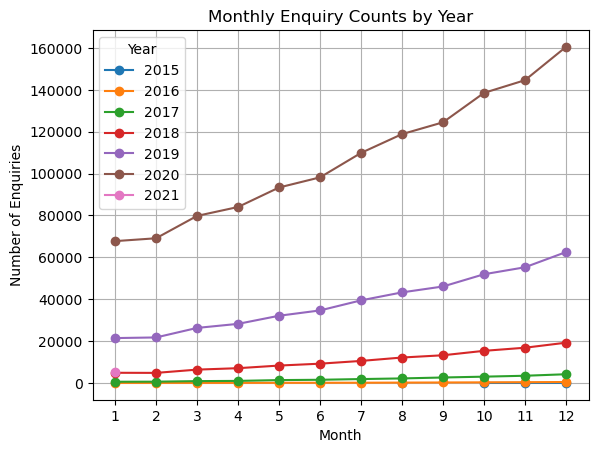

In [19]:


# Ensure datetime
train_enquiry['enquiry_date'] = pd.to_datetime(train_enquiry['enquiry_date'], errors='coerce')

# Extract year and month
train_enquiry['year'] = train_enquiry['enquiry_date'].dt.year
train_enquiry['month'] = train_enquiry['enquiry_date'].dt.month

# Group by year and month
monthly_counts = (
    train_enquiry.groupby(['year','month'])
    .size()
    .reset_index(name='count')
)

# Pivot to have months as x-axis, years as columns
monthly_pivot = monthly_counts.pivot(index='month', columns='year', values='count')

# Plot
plt.figure(figsize=(12,5))
monthly_pivot.plot(marker='o')
plt.title("Monthly Enquiry Counts by Year")
plt.xlabel("Month")
plt.ylabel("Number of Enquiries")
plt.xticks(range(1,13))
plt.legend(title='Year')
plt.grid(True)
plt.show()


**enquiry_counts**: Strong upward trend from 2015-2020 with dramatic growth; 2020 shows exponential increase reaching 160K monthly peak. Clear seasonal pattern with Q4 surge (Oct-Dec consistently highest across all years).

Monthly patterns:

Jan-Mar: Lowest activity period across all years

Apr-Jun: Gradual increase begins

Jul-Sep: Steady growth acceleration

Oct-Dec: Peak season with steepest climb, especially November-December

December: Consistently highest month for most years, suggesting year-end business cycles

Above EDAs are done on disjoint table which does not reflect alot behavioral patterns against defaulting results , thus we will do some feature extraction , engineering , aggregation of account and enquiry Data set

In [20]:
train_accounts.columns

Index(['uid', 'credit_type', 'loan_amount', 'amount_overdue', 'open_date', 'closed_date', 'payment_hist_string', 'active_flag'], dtype='object')

In [21]:
train_enquiry.columns

Index(['uid', 'enquiry_type', 'enquiry_amt', 'enquiry_date', 'year', 'month'], dtype='object')

In [22]:
""" Account data feature creation pipeline

1. Account data + active flag (already added in both train and test ) ------> Account data_1
2.Account data_1 + payment history features(fn: extract_payment_features_optimized) -------> Account_data_2
3.Account_data_2+ date features (fn: extract_top_10_date_features_with_recency)----> Account_data_3
4.Account_data_3 + aggregation ( fn :aggregate_credit_portfolio + categorize_credit_types_optimized+handle_nans+extract_date_features) -----> final_account data_uid_level

"""




def extract_payment_features_optimized(df):
    """
    Optimized payment feature extraction using pre-allocated arrays
    """
    n_rows = len(df)

    # Pre-allocate numpy arrays for all features
    num_installments = np.full(n_rows, np.nan)
    num_missed_installments = np.full(n_rows, np.nan)
    num_non_missed_installments = np.full(n_rows, np.nan)
    avg_overdue_days = np.full(n_rows, np.nan)
    max_overdue_days = np.full(n_rows, np.nan)
    overdue_ratio = np.full(n_rows, np.nan)
    max_consecutive_late = np.full(n_rows, np.nan)
    max_consecutive_good = np.full(n_rows, np.nan)
    current_streak_type = np.full(n_rows, 'unknown', dtype=object)
    moderate_late_count = np.full(n_rows, np.nan)
    severe_late_count = np.full(n_rows, np.nan)
    recent_3m_late_rate = np.full(n_rows, np.nan)
    historical_late_rate = np.full(n_rows, np.nan)
    behavior_shift_magnitude = np.full(n_rows, np.nan)
    payment_trend_direction = np.full(n_rows, np.nan)
    chronic_risk_flag = np.full(n_rows, False)
    volatile_risk_flag = np.full(n_rows, False)
    recent_deterioration_flag = np.full(n_rows, False)

    # Get payment strings as array
    payment_strings = df['payment_hist_string'].values

    # Process each row
    for i in range(n_rows):
        payment_string = payment_strings[i]

        if pd.isna(payment_string) or payment_string == '':
            continue

        try:
            # Parse payments
            payments = [int(payment_string[j:j+3])
                       for j in range(0, len(payment_string), 3)
                       if j+3 <= len(payment_string)]

            if len(payments) == 0:
                continue

            # Basic features
            num_installments[i] = len(payments)

            # Missed vs Non-missed installments
            missed_count = sum(p > 0 for p in payments)
            non_missed_count = sum(p == 0 for p in payments)

            num_missed_installments[i] = missed_count
            num_non_missed_installments[i] = non_missed_count

            # Other features
            max_overdue_days[i] = max(payments)
            overdue_ratio[i] = missed_count / len(payments)

            if missed_count > 0:
                avg_overdue_days[i] = sum(p for p in payments if p > 0) / missed_count
            else:
                avg_overdue_days[i] = 0

            # Streak calculations
            max_late = max_good = current_late = current_good = 0
            for payment in payments:
                if payment > 0:
                    current_late += 1
                    current_good = 0
                    max_late = max(max_late, current_late)
                else:
                    current_good += 1
                    current_late = 0
                    max_good = max(max_good, current_good)

            max_consecutive_late[i] = max_late
            max_consecutive_good[i] = max_good
            current_streak_type[i] = 'good' if payments[-1] == 0 else 'bad'

            # Severity counts
            moderate_late_count[i] = sum(30 <= p <= 59 for p in payments)
            severe_late_count[i] = sum(p >= 60 for p in payments)

            # Temporal analysis
            if len(payments) >= 3:
                recent_3m = payments[-3:]
                historical = payments[:-3]
                recent_3m_late_rate[i] = sum(p >= 60 for p in recent_3m) / len(recent_3m)
                if historical:
                    historical_late_rate[i] = sum(p >= 60 for p in historical) / len(historical)
                else:
                    historical_late_rate[i] = 0
            else:
                recent_3m_late_rate[i] = sum(p >= 60 for p in payments) / len(payments)
                historical_late_rate[i] = 0

            behavior_shift_magnitude[i] = abs(recent_3m_late_rate[i] - historical_late_rate[i])

            # Payment trend
            if len(payments) > 1:
                mid = len(payments) // 2
                early_avg = sum(payments[:mid]) / mid
                recent_avg = sum(payments[mid:]) / (len(payments) - mid)
                payment_trend_direction[i] = recent_avg - early_avg

            # Risk flags
            chronic_risk_flag[i] = overdue_ratio[i] > 0.4 and max_late > 4
            if len(payments) > 1:
                std_val = np.std(payments)
                volatile_risk_flag[i] = std_val > 30 and overdue_ratio[i] > 0.2

            if historical_late_rate[i] > 0:
                recent_deterioration_flag[i] = recent_3m_late_rate[i] > historical_late_rate[i] * 1.5
            else:
                recent_deterioration_flag[i] = recent_3m_late_rate[i] > 0.3

        except:
            continue

    # Create result DataFrame
    result = df.copy()
    result['num_installments'] = num_installments
    result['num_missed_installments'] = num_missed_installments
    result['num_non_missed_installments'] = num_non_missed_installments
    result['avg_overdue_days'] = avg_overdue_days
    result['max_overdue_days'] = max_overdue_days
    result['overdue_ratio'] = overdue_ratio
    result['max_consecutive_late'] = max_consecutive_late
    result['max_consecutive_good'] = max_consecutive_good
    result['current_streak_type'] = current_streak_type
    result['moderate_late_count'] = moderate_late_count
    result['severe_late_count'] = severe_late_count
    result['recent_3m_late_rate'] = recent_3m_late_rate
    result['historical_late_rate'] = historical_late_rate
    result['behavior_shift_magnitude'] = behavior_shift_magnitude
    result['payment_trend_direction'] = payment_trend_direction
    result['chronic_risk_flag'] = chronic_risk_flag
    result['volatile_risk_flag'] = volatile_risk_flag
    result['recent_deterioration_flag'] = recent_deterioration_flag

    return result





def extract_top_10_date_features_with_recency(df):
    """Extract the 10 most important date-based features including recency and month info"""

    # Convert to datetime
    df['open_date'] = pd.to_datetime(df['open_date'])
    df['closed_date'] = pd.to_datetime(df['closed_date'])
    current_date = pd.Timestamp.now()

    # 1. Account Age (months) - Most critical for risk assessment
    df['account_age_months'] = (current_date - df['open_date']).dt.days / 30.44

    # 2. Loan Duration (months) - Actual loan lifespan
    df['loan_duration_months'] = (df['closed_date'] - df['open_date']).dt.days / 30.44

    # 3. **RECENCY SCORE** - How recently the account was opened (0-1 scale)
    max_age = df['account_age_months'].max()
    # Avoid division by zero if max_age is 0 or NaN
    df['recency_score'] = 1 - (df['account_age_months'] / (max_age if max_age > 0 else 1e-9))  # Higher = more recent
    df['recency_score'] = df['recency_score'].clip(lower=0) # Ensure score is not negative

    # 4. Opening Month - Actual month when account was opened (1-12)
    df['open_month'] = df['open_date'].dt.month

    # 5. Closing Month - Actual month when account was closed (1-12)
    df['closed_month'] = df['closed_date'].dt.month

    # 6. Early Closure Flag - Closed before expected maturity
    df['closed_before_maturity'] = (
        (df['loan_duration_months'] < df['num_installments']) &
        (df['active_flag'] == 0)
    ).astype(int)

    # 7. Payment Efficiency - Installments per month of loan life
    df['payments_per_month'] = df['num_installments'] / np.maximum(df['loan_duration_months'], 1e-9) # Avoid division by zero
    df['payments_per_month'] = df['payments_per_month'].fillna(0)

    # 8. Vintage Year - Year when account was opened
    df['vintage_year'] = df['open_date'].dt.year

    # 9. Account Age Category - Bucketed age for risk profiling
    df['account_age_bucket'] = pd.cut(
        df['account_age_months'],
        bins=[0, 6, 12, 24, 36, np.inf],
        labels=[0, 1, 2, 3, 4],
        right=False # Ensure 0 is included in the first bin
    ).astype(float)

    # 10. Early Default Risk - Payment issues in first 6 months
    df['early_payment_issues'] = (
        (df['num_missed_installments'] > 0) &
        (df['account_age_months'] <= 6)
    ).astype(int)

    return df


import pandas as pd

def extract_date_features(df):
    """
    Extract useful features from date columns before aggregation
    """
    df = df.copy()
    if 'open_date' in df.columns:
        df['open_date'] = pd.to_datetime(df['open_date'], errors='coerce')
        df['open_year'] = df['open_date'].dt.year
        df['open_quarter'] = df['open_date'].dt.quarter
        df['days_since_opening'] = (pd.Timestamp.now() - df['open_date']).dt.days
    if 'closed_date' in df.columns:
        df['closed_date'] = pd.to_datetime(df['closed_date'], errors='coerce')
        df['closed_year'] = df['closed_date'].dt.year
        df['days_since_closure'] = (pd.Timestamp.now() - df['closed_date']).dt.days
        if 'open_date' in df.columns:
            df['actual_loan_duration_days'] = (df['closed_date'] - df['open_date']).dt.days
    return df

def categorize_credit_types_optimized(df):
    """
    Categorize into 3 categories: top 2 separate + all others combined
    """
    credit_mapping = {
        'Consumer credit': 'consumer_credit',
        'Credit card': 'credit_card',
        'Car loan': 'other_loans',
        'Mortgage': 'other_loans',
        'Real estate loan': 'other_loans',
        'Loan for business development': 'other_loans',
        'Loan for working capital replenishment': 'other_loans',
        'Loan for the purchase of equipment': 'other_loans',
        'Microloan': 'other_loans',
        'Another type of loan': 'other_loans',
        'Unknown type of loan': 'other_loans',
        'Cash loan (non-earmarked)': 'other_loans',
        'Loan for purchase of shares (margin lending)': 'other_loans',
        'Interbank credit': 'other_loans',
        'Mobile operator loan': 'other_loans'
    }
    df_copy = df.copy()
    df_copy['credit_type'] = df_copy['credit_type'].map(credit_mapping)
    return df_copy

def add_portfolio_metrics(df):
    """
    Add portfolio totals and percentages (amount/count) by category for each uid
    Returns: DataFrame with columns per uid, category, and portfolio-wide totals
    """
    # Group by uid, credit_type for totals per category
    cat_totals = df.groupby(['uid', 'credit_type']).agg(
        category_loan_amount=('loan_amount', 'sum'),
        category_loan_count=('loan_amount', 'count')
    ).reset_index()
    # Get user-level totals
    user_totals = cat_totals.groupby('uid').agg(
        total_loan_amount=('category_loan_amount', 'sum'),
        total_loan_count=('category_loan_count', 'sum')
    ).reset_index()
    # Merge so each category row has user-level totals
    cat_totals = cat_totals.merge(user_totals, on='uid', how='left')
    # Calculate percent of amount and percent of count for each category
    cat_totals['category_amt_pct'] = (cat_totals['category_loan_amount'] / cat_totals['total_loan_amount']).fillna(0)
    cat_totals['category_cnt_pct'] = (cat_totals['category_loan_count'] / cat_totals['total_loan_count']).fillna(0)
    # Pivot so each uid has columns for each category
    portfolio_summary = cat_totals.pivot(index='uid', columns='credit_type',
        values=['category_loan_amount','category_loan_count','category_amt_pct','category_cnt_pct']
    )
    # Flatten columns
    portfolio_summary.columns = ['{}_{}'.format(a,b) for a,b in portfolio_summary.columns]
    # Merge user-level totals as columns
    portfolio_summary = portfolio_summary.merge(user_totals, on='uid', how='left')
    return portfolio_summary.reset_index()

def handle_nans(df):
    """
    Fill numeric columns and categorical columns with appropriate defaults
    """
    # Fill numeric columns with 0
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = df[numeric_cols].fillna(0)
    # Fill specific month/quarter with 0
    for col in df.columns:
        if 'closed_month_' in col or 'open_quarter_' in col:
            df[col] = df[col].fillna(0)
    date_cols = [col for col in df.columns if 'date' in col.lower() and 'days_' not in col]
    df = df.drop(columns=date_cols, errors='ignore')
    return df

def aggregate_credit_portfolio(df):
    """
    Aggregates loan-level features to uid-level, adds portfolio metrics and category percentages.
    """
    df = extract_date_features(df)
    df = categorize_credit_types_optimized(df)
    # Add portfolio summary columns
    portfolio_metrics = add_portfolio_metrics(df)
    df['loan_count'] = 1
    streak_dummies = pd.get_dummies(df['current_streak_type'], prefix='current_streak')
    df = pd.concat([df, streak_dummies], axis=1)
    if df['account_age_bucket'].dtype == 'object' or df['account_age_bucket'].dtype.name == 'category':
        age_bucket_dummies = pd.get_dummies(df['account_age_bucket'], prefix='age_bucket')
        df = pd.concat([df, age_bucket_dummies], axis=1)
    agg_map = {
        'loan_amount': 'sum',
        'amount_overdue': 'sum',
        'active_flag': 'sum',
        'num_installments': 'sum',
        'num_missed_installments': 'sum',
        'num_non_missed_installments': 'sum',
        'avg_overdue_days': 'mean',
        'max_overdue_days': 'max',
        'overdue_ratio': 'mean',
        'max_consecutive_late': 'max',
        'max_consecutive_good': 'max',
        'moderate_late_count': 'sum',
        'severe_late_count': 'sum',
        'recent_3m_late_rate': 'mean',
        'historical_late_rate': 'mean',
        'behavior_shift_magnitude': 'mean',
        'payment_trend_direction': 'mean',
        'chronic_risk_flag': 'sum',
        'volatile_risk_flag': 'sum',
        'recent_deterioration_flag': 'sum',
        'account_age_months': 'max',
        'loan_duration_months': 'max',
        'recency_score': 'max',
        'open_month': lambda x: x.mode().iloc[0] if not x.mode().empty else 0, # Changed .iat[0] to .iloc[0]
        'closed_month': lambda x: x.mode().iloc[0] if not x.mode().empty else 0, # Changed .iat to .iloc[0]
        'closed_before_maturity': 'sum',
        'payments_per_month': 'mean',
        'vintage_year': 'min',
        'early_payment_issues': 'sum',
        'loan_count': 'count',
        'open_year': 'min',
        'open_quarter': lambda x: x.mode().iloc[0] if not x.mode().empty else 0, # Changed .iat[0] to .iloc[0]
        'closed_year': 'max',
        'days_since_opening': 'max',
        'days_since_closure': 'min',
        'actual_loan_duration_days': 'mean',
        'current_streak_good': 'sum',
        'current_streak_bad': 'sum',
        'current_streak_unknown': 'sum'
    }
    age_bucket_cols = [col for col in df.columns if col.startswith('age_bucket_')]
    for col in age_bucket_cols:
        agg_map[col] = 'sum'
    agg_map = {k: v for k, v in agg_map.items() if k in df.columns}
    agg = df.groupby(['uid', 'credit_type']).agg(agg_map).reset_index()
    wide = agg.pivot(index='uid', columns='credit_type')
    wide.columns = [f"{feature}_{ctype}" for feature, ctype in wide.columns]
    wide = wide.reset_index()
    wide = handle_nans(wide)
    # Merge portfolio metrics into wide output (by uid)
    final = pd.merge(wide, portfolio_metrics, on='uid', how='left')
    return handle_nans(final)

In [23]:
"""Account function pipeline applying """

df_uid_level_account_train = aggregate_credit_portfolio(extract_top_10_date_features_with_recency(extract_payment_features_optimized(train_accounts)))
df_uid_level_account_test = aggregate_credit_portfolio(extract_top_10_date_features_with_recency(extract_payment_features_optimized(test_accounts)))

In [24]:
df_uid_level_account_train.tail(2)

,uid,loan_amount_consumer_credit,loan_amount_credit_card,loan_amount_other_loans,amount_overdue_consumer_credit,amount_overdue_credit_card,amount_overdue_other_loans,active_flag_consumer_credit,active_flag_credit_card,active_flag_other_loans,num_installments_consumer_credit,num_installments_credit_card,num_installments_other_loans,num_missed_installments_consumer_credit,num_missed_installments_credit_card,num_missed_installments_other_loans,num_non_missed_installments_consumer_credit,num_non_missed_installments_credit_card,num_non_missed_installments_other_loans,avg_overdue_days_consumer_credit,avg_overdue_days_credit_card,avg_overdue_days_other_loans,max_overdue_days_consumer_credit,max_overdue_days_credit_card,max_overdue_days_other_loans,overdue_ratio_consumer_credit,overdue_ratio_credit_card,overdue_ratio_other_loans,max_consecutive_late_consumer_credit,max_consecutive_late_credit_card,max_consecutive_late_other_loans,max_consecutive_good_consumer_credit,max_consecutive_good_credit_card,max_consecutive_good_other_loans,moderate_late_count_consumer_credit,moderate_late_count_credit_card,moderate_late_count_other_loans,severe_late_count_consumer_credit,severe_late_count_credit_card,severe_late_count_other_loans,recent_3m_late_rate_consumer_credit,recent_3m_late_rate_credit_card,recent_3m_late_rate_other_loans,historical_late_rate_consumer_credit,historical_late_rate_credit_card,historical_late_rate_other_loans,behavior_shift_magnitude_consumer_credit,behavior_shift_magnitude_credit_card,behavior_shift_magnitude_other_loans,payment_trend_direction_consumer_credit,payment_trend_direction_credit_card,payment_trend_direction_other_loans,chronic_risk_flag_consumer_credit,chronic_risk_flag_credit_card,chronic_risk_flag_other_loans,volatile_risk_flag_consumer_credit,volatile_risk_flag_credit_card,volatile_risk_flag_other_loans,recent_deterioration_flag_consumer_credit,recent_deterioration_flag_credit_card,recent_deterioration_flag_other_loans,account_age_months_consumer_credit,account_age_months_credit_card,account_age_months_other_loans,loan_duration_months_consumer_credit,loan_duration_months_credit_card,loan_duration_months_other_loans,recency_score_consumer_credit,recency_score_credit_card,recency_score_other_loans,open_month_consumer_credit,open_month_credit_card,open_month_other_loans,closed_month_consumer_credit,closed_month_credit_card,closed_month_other_loans,closed_before_maturity_consumer_credit,closed_before_maturity_credit_card,closed_before_maturity_other_loans,payments_per_month_consumer_credit,payments_per_month_credit_card,payments_per_month_other_loans,vintage_year_consumer_credit,vintage_year_credit_card,vintage_year_other_loans,early_payment_issues_consumer_credit,early_payment_issues_credit_card,early_payment_issues_other_loans,loan_count_consumer_credit,loan_count_credit_card,loan_count_other_loans,open_year_consumer_credit,open_year_credit_card,open_year_other_loans,open_quarter_consumer_credit,open_quarter_credit_card,open_quarter_other_loans,closed_year_consumer_credit,closed_year_credit_card,closed_year_other_loans,days_since_opening_consumer_credit,days_since_opening_credit_card,days_since_opening_other_loans,days_since_closure_consumer_credit,days_since_closure_credit_card,days_since_closure_other_loans,actual_loan_duration_days_consumer_credit,actual_loan_duration_days_credit_card,actual_loan_duration_days_other_loans,current_streak_good_consumer_credit,current_streak_good_credit_card,current_streak_good_other_loans,current_streak_bad_consumer_credit,current_streak_bad_credit_card,current_streak_bad_other_loans,current_streak_unknown_consumer_credit,current_streak_unknown_credit_card,current_streak_unknown_other_loans,index,category_loan_amount_consumer_credit,category_loan_amount_credit_card,category_loan_amount_other_loans,category_loan_count_consumer_credit,category_loan_count_credit_card,category_loan_count_other_loans,category_amt_pct_consumer_credit,category_amt_pct_credit_card,category_amt_pct_ot

In [25]:
""" enquiry pipeline for feature  extraction """


def extract_enquiry_date_features(df):
    """Extract useful features from enquiry_date column"""
    df = df.copy()
    df['enquiry_date'] = pd.to_datetime(df['enquiry_date'], errors='coerce')
    df['enquiry_year'] = df['enquiry_date'].dt.year
    df['enquiry_month'] = df['enquiry_date'].dt.month
    df['enquiry_quarter'] = df['enquiry_date'].dt.quarter
    df['enquiry_day_of_week'] = df['enquiry_date'].dt.dayofweek

    current_date = pd.Timestamp.now()
    df['days_since_enquiry'] = (current_date - df['enquiry_date']).dt.days
    df['months_since_enquiry'] = df['days_since_enquiry'] / 30.44
    df['enquiry_vintage'] = current_date.year - df['enquiry_year']

    return df

def categorize_enquiry_types(df):
    """Map enquiry_type to three categories and fill unknowns"""
    mapping = {
        'Consumer credit': 'consumer_credit',
        'Credit card': 'credit_card',
        'Car loan': 'other_loans',
        'Mortgage': 'other_loans',
        'Real estate loan': 'other_loans',
        'Loan for business development': 'other_loans',
        'Loan for working capital replenishment': 'other_loans',
        'Loan for the purchase of equipment': 'other_loans',
        'Microloan': 'other_loans',
        'Another type of loan': 'other_loans',
        'Unknown type of loan': 'other_loans',
        'Cash loan (non-earmarked)': 'other_loans',
        'Loan for purchase of shares (margin lending)': 'other_loans',
        'Interbank credit': 'other_loans',
        'Mobile operator loan': 'other_loans'
    }
    df = df.copy()
    # defensively normalize strings and map; fill unknowns to 'other_loans'
    df['enquiry_type'] = df['enquiry_type'].astype(str).str.strip().map(mapping).fillna('other_loans')
    return df

def aggregate_enquiry_portfolio(df):
    """
    Aggregates enquiry-level info to uid-level with wide features per enquiry_type.
    Returns: wide dataframe indexed by uid with user totals appended.
    """
    if df is None or df.shape[0] == 0:
        return pd.DataFrame()

    df = df.copy()
    df = extract_enquiry_date_features(df)
    df = categorize_enquiry_types(df)

    # ensure numeric amounts
    df['enquiry_amt'] = pd.to_numeric(df.get('enquiry_amt', 0), errors='coerce').fillna(0)
    df['enquiry_count'] = 1

    # per (uid, enquiry_type) basic sums
    portfolio_summary = (
        df.groupby(['uid', 'enquiry_type'])
          .agg(category_enquiry_amount=('enquiry_amt', 'sum'),
               category_enquiry_count=('enquiry_count', 'sum'))
          .reset_index()
    )

    # user totals
    user_totals = (
        portfolio_summary.groupby('uid')
        .agg(total_enquiry_amount=('category_enquiry_amount', 'sum'),
             total_enquiry_count=('category_enquiry_count', 'sum'))
        .reset_index()
    )

    # merge totals -> get pct columns
    portfolio_summary = portfolio_summary.merge(user_totals, on='uid', how='left')
    portfolio_summary['category_amt_pct'] = (
        portfolio_summary['category_enquiry_amount'] / portfolio_summary['total_enquiry_amount']
    ).fillna(0)
    portfolio_summary['category_cnt_pct'] = (
        portfolio_summary['category_enquiry_count'] / portfolio_summary['total_enquiry_count']
    ).fillna(0)

    # more detailed aggregations per uid/enquiry_type
    def mode_or_nan(x):
        m = x.mode()
        return m.iat[0] if (not m.empty) else np.nan

    agg_df = (
        df.groupby(['uid', 'enquiry_type'])
          .agg(total_amount=('enquiry_amt', 'sum'),
               total_count=('enquiry_count', 'sum'),
               first_enquiry_year=('enquiry_year', 'min'),
               last_enquiry_year=('enquiry_year', 'max'),
               mode_enquiry_month=('enquiry_month', mode_or_nan),
               mode_enquiry_quarter=('enquiry_quarter', mode_or_nan),
               mode_day_of_week=('enquiry_day_of_week', mode_or_nan),
               days_since_min=('days_since_enquiry', 'min'),
               days_since_max=('days_since_enquiry', 'max'),
               days_since_mean=('days_since_enquiry', 'mean'),
               months_since_min=('months_since_enquiry', 'min'),
               months_since_max=('months_since_enquiry', 'max'),
               months_since_mean=('months_since_enquiry', 'mean'),
               enquiry_vintage_min=('enquiry_vintage', 'min'),
               enquiry_vintage_max=('enquiry_vintage', 'max')
              )
          .reset_index()
    )

    # Merge percentage / category summary metrics
    merged = agg_df.merge(
        portfolio_summary[['uid', 'enquiry_type', 'category_enquiry_amount', 'category_enquiry_count', 'category_amt_pct', 'category_cnt_pct']],
        on=['uid', 'enquiry_type'],
        how='left'
    )

    # Pivot to wide: each (feature, enquiry_type) => feature_enquirytype
    wide = merged.set_index(['uid', 'enquiry_type']).unstack('enquiry_type')

    # Flatten multiindex columns: ('total_amount','consumer_credit') -> 'total_amount_consumer_credit'
    wide.columns = [f"{feat}_{etype}" for feat, etype in wide.columns]
    wide = wide.reset_index()

    # Add user totals back
    wide = wide.merge(user_totals, on='uid', how='left')

    # Fill numeric NaNs with 0 (leaves mode-month/day as NaN if truly missing)
    num_cols = wide.select_dtypes(include=[np.number]).columns.tolist()
    wide[num_cols] = wide[num_cols].fillna(0)

    return wide


In [ ]:
"""Enquiry function pipeline applying """

df_uid_level_enquiry_train = aggregate_enquiry_portfolio(train_enquiry)
df_uid_level_enquiry_test = aggregate_enquiry_portfolio(test_enquiry)

# checking number of rows as all dataframe are set to uid level

In [ ]:
print("df_uid_level_enquiry_train:", len(df_uid_level_enquiry_train))
print("df_uid_level_account_train:", len(df_uid_level_account_train))
print("train_flag                :", len(train_flag))
print("df_uid_level_enquiry_test :", len(df_uid_level_enquiry_test))

print("df_uid_level_account_test :", len(df_uid_level_account_test))

print("test_flag                 :", len(test_flag))


In [ ]:
train_flag.NAME_CONTRACT_TYPE.value_counts()

**Summary of rows matching**
1. Both account dataset in train and test are missing exact 14% of uids
2. where else enquiry row matches with flag datasets in both cases
3. It means its a systematic error which can be impacted due to faulty pipeline


**We can seperate the data sets into further two part model system**
1. enquiry only ( uids which does not exist in accounts)
2.  accounts+ enquiry

In [ ]:
""" Train data modification"""


# 1. Merge dataframes
train_full_data = (
    train_flag
    .merge(df_uid_level_enquiry_train, on="uid", how="left")
    .merge(df_uid_level_account_train, on="uid", how="left")
)

# 2. One-hot encode
if "NAME_CONTRACT_TYPE" in train_full_data.columns:
    train_full_data = pd.get_dummies(
        train_full_data,
        columns=["NAME_CONTRACT_TYPE"],
        prefix="contract",
        drop_first=True
    )
    dummy_cols = [col for col in train_full_data.columns if col.startswith("contract_")]
    train_full_data[dummy_cols] = train_full_data[dummy_cols].astype(int)

# 3. Identify actual account cols present after merge
account_cols = [col for col in df_uid_level_account_train.columns if col != "uid"]
account_cols = [col for col in account_cols if col in train_full_data.columns]

# 4a. enquiry-only rows (all account cols are NaN)
train_data_only_enquiry = train_full_data[
    train_full_data[account_cols].isna().all(axis=1)
].copy()
train_data_only_enquiry = train_data_only_enquiry.drop(columns=account_cols)

# 4b. enquiry+account rows (rest)
train_data_enquiry_n_account = train_full_data.drop(train_data_only_enquiry.index)
#dropping duplicate columns
train_full_data = train_full_data.loc[:, ~train_full_data.columns.duplicated()]
train_data_only_enquiry = train_data_only_enquiry.loc[:, ~train_data_only_enquiry.columns.duplicated()]
train_data_enquiry_n_account = train_data_enquiry_n_account.loc[:, ~train_data_enquiry_n_account.columns.duplicated()]

# 5. Sanity check
print("Full data length: ", len(train_full_data))
print("Enquiry only length: ", len(train_data_only_enquiry))
print("Enquiry + account length: ", len(train_data_enquiry_n_account))
print("Check sum equals full:",
      len(train_data_only_enquiry) + len(train_data_enquiry_n_account) == len(train_full_data))


In [ ]:
train_full_data.head()

In [ ]:
""" Test data Modification"""
# 1. Merge dataframes
test_full_data = (
    test_flag
    .merge(df_uid_level_enquiry_test, on="uid", how="left")
    .merge(df_uid_level_account_test, on="uid", how="left")
)

# 2. One-hot encode
if "NAME_CONTRACT_TYPE" in test_full_data.columns:
    test_full_data = pd.get_dummies(
        test_full_data,
        columns=["NAME_CONTRACT_TYPE"],
        prefix="contract",
        drop_first=True
    )
    dummy_cols = [col for col in test_full_data.columns if col.startswith("contract_")]
    test_full_data[dummy_cols] = test_full_data[dummy_cols].astype(int)

# 3. Identify actual account cols present after merge
account_cols = [col for col in df_uid_level_account_test.columns if col != "uid"]
account_cols = [col for col in account_cols if col in test_full_data.columns]

# 4a. enquiry-only rows (all account cols are NaN)
test_data_only_enquiry = test_full_data[
    test_full_data[account_cols].isna().all(axis=1)
].copy()
test_data_only_enquiry = test_data_only_enquiry.drop(columns=account_cols)

# 4b. enquiry+account rows (rest)
test_data_enquiry_n_account = test_full_data.drop(test_data_only_enquiry.index)
# Drop duplicates
test_full_data = test_full_data.loc[:, ~test_full_data.columns.duplicated()]
test_data_only_enquiry = test_data_only_enquiry.loc[:, ~test_data_only_enquiry.columns.duplicated()]
test_data_enquiry_n_account = test_data_enquiry_n_account.loc[:, ~test_data_enquiry_n_account.columns.duplicated()]

# 5. Sanity check
print("Full data length: ", len(test_full_data))
print("Enquiry only length: ", len(test_data_only_enquiry))
print("Enquiry + account length: ", len(test_data_enquiry_n_account))
print("Check sum equals full:",
      len(test_data_only_enquiry) + len(test_data_enquiry_n_account) == len(test_full_data))


In [ ]:
test_full_data.head()

# For account and enquriy data set

In [ ]:
#EDA correlation heatmap
# Compute correlation matrix (numeric columns only)
corr = train_data_enquiry_n_account.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=False,   # set True if you want correlation values displayed
    linewidths=0.5
)
plt.title("Correlation Heatmap: train_data_enquiry_n_account", fontsize=14)
plt.show()

In [ ]:
""" Highly correlated top 10 target columns"""

# 1. Compute correlations with TARGET (numeric cols only)
corr_with_target = (
    train_data_enquiry_n_account
    .corr(numeric_only=True)["TARGET"]
    .sort_values(key=abs, ascending=False)   # sort by absolute correlation
)

# 2. Display
print("Correlation of features with TARGET:")
print(corr_with_target)

# 3. (Optional) Plot top 15 correlated features
top_corr = corr_with_target.drop("TARGET").head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
top_corr.plot(kind="barh")
plt.title("Top correlated features with TARGET", fontsize=14)
plt.xlabel("Correlation")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
"""highly collienear pairs"""

# 1. Compute correlation matrix (numeric columns only, drop TARGET)
corr_matrix = train_data_enquiry_n_account.drop(columns=["TARGET"], errors="ignore").corr(numeric_only=True)

# 2. Find pairs above threshold
threshold = 0.8
high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # keep only upper triangle
    .stack()                                                                  # flatten
    .reset_index()
)
high_corr_pairs.columns = ["Feature1", "Feature2", "Correlation"]

# 3. Filter by absolute correlation
high_corr_pairs = high_corr_pairs.loc[high_corr_pairs["Correlation"].abs() > threshold] \
                                 .sort_values(by="Correlation", ascending=False)

print("Highly collinear feature pairs (|corr| > 0.8):")
print(high_corr_pairs)


In [ ]:
import pandas as pd
import numpy as np

def calc_iv(df, feature, target, bins=10):
    """Calculate IV (Information Value) for a feature wrt binary target."""
    # Handle numeric vs categorical
    if pd.api.types.is_numeric_dtype(df[feature]):
        df['temp_bin'] = pd.qcut(df[feature].rank(method='first'), q=bins, duplicates='drop')
    else:
        df['temp_bin'] = df[feature]

    grouped = df.groupby('temp_bin')[target].agg(['count','sum'])
    grouped['non_event'] = grouped['count'] - grouped['sum']
    event_total = grouped['sum'].sum()
    non_event_total = grouped['non_event'].sum()

    # Avoid division by zero
    grouped['event_dist'] = grouped['sum'] / (event_total + 1e-10)
    grouped['non_event_dist'] = grouped['non_event'] / (non_event_total + 1e-10)

    grouped['woe'] = np.log((grouped['event_dist'] + 1e-10) / (grouped['non_event_dist'] + 1e-10))
    grouped['iv'] = (grouped['event_dist'] - grouped['non_event_dist']) * grouped['woe']

    iv = grouped['iv'].sum()
    df.drop(columns=['temp_bin'], inplace=True, errors='ignore')
    return iv

# Calculate IV for all features except TARGET
iv_dict = {}
for col in train_data_enquiry_n_account.columns:
    if col != "TARGET":
        try:
            iv = calc_iv(train_data_enquiry_n_account[[col, "TARGET"]].dropna(), col, "TARGET")
            iv_dict[col] = iv
        except Exception as e:
            pass  # skip columns that fail

# Put into DataFrame
iv_df = pd.DataFrame(list(iv_dict.items()), columns=["Feature", "IV"]).sort_values(by="IV", ascending=False)

# Common cutoffs for IV (rule of thumb in credit risk)
# <0.02 : Not useful
# 0.02–0.1 : Weak
# 0.1–0.3 : Medium
# 0.3–0.5 : Strong
# >0.5 : Suspiciously powerful (maybe data leakage)

# Count features above threshold (say 0.02)
useful_features = iv_df[iv_df["IV"] >= 0.02]

print("Number of columns satisfying VIR/IV threshold:", len(useful_features))
print(useful_features)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

train_data_enquiry_n_account = train_data_enquiry_n_account.drop(columns=["index"], errors="ignore")

# ===============================
# 1. Split into X (features) and y (target), drop uid
# ===============================
X = train_data_enquiry_n_account.drop(columns=["TARGET", "uid"], errors="ignore")
y = train_data_enquiry_n_account["TARGET"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# 2. Train Random Forest
# ===============================
rf = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=None,          # let trees expand fully
    random_state=42,
    n_jobs=-1,               # use all CPU cores
    class_weight="balanced"  # handles class imbalance
)

rf.fit(X_train, y_train)

# ===============================
# 3. Evaluate performance
# ===============================
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# ===============================
# 4. Feature importance
# ===============================
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_feat = feat_importances.sort_values(ascending=False).head(30)

plt.figure(figsize=(8,10))
top_feat.plot(kind="barh")
plt.title("Top 130 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier, plot_importance
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# 0. Drop accidental index column if present
# ===============================
train_data_enquiry_n_account = train_data_enquiry_n_account.drop(columns=["index"], errors="ignore")

# ===============================
# 1. Split into X (features) and y (target), drop uid
# ===============================
X = train_data_enquiry_n_account.drop(columns=["TARGET", "uid"], errors="ignore")
y = train_data_enquiry_n_account["TARGET"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# 2. Train XGBoost Classifier
# ===============================
xgb = XGBClassifier(
    n_estimators=300,        # number of boosting rounds
    learning_rate=0.05,      # shrinkage step
    max_depth=6,             # depth of trees
    subsample=0.8,           # row sampling
    colsample_bytree=0.8,    # feature sampling
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]) # handle imbalance
)

xgb.fit(X_train, y_train)

# ===============================
# 3. Evaluate performance
# ===============================
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:,1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# ===============================
# 4. Feature Importance (Top 30)
# ===============================
importances = pd.DataFrame({
    "feature": X.columns,
    "importance": xgb.feature_importances_
}).sort_values(by="importance", ascending=False)

print("\nTop 30 Features:")
print(importances.head(30))

# Plot top 30
plt.figure(figsize=(10, 8))
plt.barh(importances.head(30)["feature"], importances.head(30)["importance"])
plt.gca().invert_yaxis()
plt.title("Top 30 XGBoost Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from lightgbm import LGBMClassifier
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# 0. Drop accidental index column if present
# ===============================
train_data_enquiry_n_account = train_data_enquiry_n_account.drop(columns=["index"], errors="ignore")

# ===============================
# 1. Split into X (features) and y (target), drop uid
# ===============================
X = train_data_enquiry_n_account.drop(columns=["TARGET", "uid"], errors="ignore")
y = train_data_enquiry_n_account["TARGET"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# 2. Train LightGBM Classifier
# ===============================
lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,          # -1 means no limit
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"  # auto-handles imbalance
)

lgbm.fit(X_train, y_train)

# ===============================
# 3. Evaluate performance
# ===============================
y_pred = lgbm.predict(X_test)
y_proba = lgbm.predict_proba(X_test)[:,1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# ===============================
# 4. Feature Importance (Top 30)
# ===============================
importances = pd.DataFrame({
    "feature": X.columns,
    "importance": lgbm.feature_importances_
}).sort_values(by="importance", ascending=False)

print("\nTop 30 Features:")
print(importances.head(30))

# Plot top 30
plt.figure(figsize=(10, 8))
plt.barh(importances.head(30)["feature"], importances.head(30)["importance"])
plt.gca().invert_yaxis()
plt.title("Top 30 LightGBM Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from lightgbm import LGBMClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ===============================
# 0. Drop accidental index column if present
# ===============================
train_data_enquiry_n_account = train_data_enquiry_n_account.drop(columns=["index"], errors="ignore")

# ===============================
# 1. Split into X (features) and y (target), drop uid
# ===============================
X = train_data_enquiry_n_account.drop(columns=["TARGET", "uid"], errors="ignore")
y = train_data_enquiry_n_account["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# 2. Define parameter space for Randomized Search
# ===============================
param_dist = {
    "num_leaves": np.arange(20, 150, 10),          # tree complexity
    "max_depth": [-1, 4, 6, 8, 10, 12, 15],        # -1 = no limit
    "learning_rate": [0.01, 0.03, 0.05, 0.1],      # shrinkage
    "n_estimators": np.arange(100, 1000, 100),     # boosting rounds
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],        # row sampling
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0], # feature sampling
    "min_child_samples": [10, 20, 30, 50, 100],    # min data per leaf
    "reg_alpha": [0, 0.01, 0.1, 1, 10],            # L1 regularization
    "reg_lambda": [0, 0.01, 0.1, 1, 10]            # L2 regularization
}

# ===============================
# 3. Randomized Search
# ===============================
lgbm = LGBMClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

rs = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=5,               # number of random configs to try
    scoring="roc_auc",       # optimize AUC
    cv=3,                    # 3-fold CV
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rs.fit(X_train, y_train)

print("Best Parameters:", rs.best_params_)
print("Best CV Score:", rs.best_score_)

# ===============================
# 4. Evaluate tuned model on Test Set
# ===============================
best_lgbm = rs.best_estimator_

y_pred = best_lgbm.predict(X_test)
y_proba = best_lgbm.predict_proba(X_test)[:,1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))

# ===============================
# 5. Feature Importance (Top 30)
# ===============================
importances = pd.DataFrame({
    "feature": X.columns,
    "importance": best_lgbm.feature_importances_
}).sort_values(by="importance", ascending=False)

print("\nTop 30 Features:")
print(importances.head(30))

plt.figure(figsize=(10, 8))
plt.barh(importances.head(30)["feature"], importances.head(30)["importance"])
plt.gca().invert_yaxis()
plt.title("Top 30 LightGBM Feature Importances (Tuned)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
